## Simulação de ondas 2D com Python

### Descrição do Fenómeno Escolhido
Com este projeto computacional pretende-se mostrar como, usando Python, é possível simular e visualizar ondas a 2 dimensões usando o Método das Diferenças Finitas. Também veremos alguns exemplos de interferência, mais uma vez, com enfoque na visualização do fenómeno.

### Descrição das Ferramentas Utilizadas
Para este projeto usou-se a linguagem Python, em Jupyter Notebooks. Os Jupyter Notebooks permitem integrar texto com código de uma forma interativa para a partilha fácil e intuitiva entre diferentes pessoas. Tomou-se partido disso para realizar este relatório, que vai discutindo e apresentando os resultados intercaladamente com os vários blocos de código. Escolheu-se Python por ser uma linguagem pragmática, com excelentes bibliotecas e muito potencial de aprendizagem.

### Descrição do Método Utilizado - Método das Diferenças Finitas
Para este método partimos da equação das ondas. Como vimos durante o semestre, a equação das ondas é uma consequência da relação de dispersão, mas a sua forma torna-a muito útil para esta simulação. Para este projeto, irei considerar ondas acústicas, ou seja, a onda é dada pela pressão $p$. Em 2D a equação acústica de ondas é dada por: 

$$
\frac{\partial^2{p}(x,y,t)}{\partial{t}²} \ = \ v^2 (\frac{\partial^2{p}(x,y,t)}{\partial{x}²} + \frac{\partial^2{p}(x,y,t)}{\partial{y}²})
$$

No fundo, o Método das Diferenças Finitas é uma aproximação no cálculo das derivadas. Olhemos para três definições diferentes de derivada:

\begin{equation} 
f^{\prime}(x)=\lim_{dx \to 0}\dfrac{f(x+dx)-f(x)}{dx}
\end{equation} 

\begin{equation} 
f^{\prime}(x)=\lim_{dx \to 0}\dfrac{f(x)-f(x-dx)}{dx}
\end{equation} 

\begin{equation} 
f^{\prime}(x)=\lim_{dx \to 0}\dfrac{f(x+dx)-f(x-dx)}{2dx}
\end{equation} 

Para obter uma aproximação destes cálculos, esquecemos o limite e calculamos o valor da derivada com um $dx$ "pequeno". O que "pequeno" quer dizer concretamente veremos mais tarde. Por enquanto, observemos que este método de cálculo da derivada é uma aproximação e, como tal, podemos ter uma noção da ordem de grandeza do erro. Para isso, expandimos o cálculo com Séries de Taylor:

$$
f(x+dx)=\sum_{n=0}^\infty \frac{f^{(n)}(x)}{n!}dx^{n}  
$$

Para a primeira definição de derivada, podemos rearranjar os termos e obter:
\begin{equation} 
\dfrac{f(x+dx)-f(x)}{dx}  = f^{\prime}(x) + O(dx)
\end{equation} 

Ou seja, o erro é em ordem a $dx$. Repetindo a matemática para as outras duas definições, o erro na segunda é igual, mas, surpreendentemente, na terceira definição o erro vai em ordem a $dx²$: 

\begin{equation} 
\dfrac{f(x+dx)-f(x-dx)}{2dx}  = f^{\prime}(x) + O(dx²)
\end{equation} 

Logo, à partida, esta será a melhor aproximação a utilizar para a primeira derivada.

No entanto, precisamos de aproximações para derivadas de segunda ordem. Seguindo uma lógica semelhante, podemos chegar à conclusão de uma boa aproximação para a segunda derivada, usando os mesmos três pontos: $f(x+dx), f(x)$ e $ f(x-dx)$:

\begin{equation} 
f^{\prime\prime}(x) \approx \dfrac{f(x+dx)- 2f(x) + f(x-dx)}{dx²}  
\end{equation} 

O que tudo isto significa é que estamos a discretizar o espaço e o tempo. Em vez de ser contínuo, temos uma grelha de quadrados de lado dx e dy, que varia no tempo em pequenos passos dt, e a cada quadrado está associado um valor de pressão:

$$
p(x,y,t) \ \rightarrow \ p^n_{i,j} \ = \ p(i dx, j dy, n dt) \ .
$$

Ou seja, estamos a fazer o oposto daquilo que fizemos quando passámos de osciladores discretos para oscilações contínuas.

Para finalizar esta já longa discussão, observemos que o que pretendemos é saber a evolução da pressão com o tempo em cada quadrado. Podemos sabê-lo aplicando as aproximações à equação de ondas:

$$
 \frac{p_{i,j}^{n+1} - 2 p_{i,j}^n + p_{i,j}^{n-1}}{dt^2} \ = \ c^2 ( \frac{\partial^2{p}(x,y,t)}{\partial{x}²} + \frac{\partial^2{p}(x,y,t)}{\partial{y}²})
$$

em que:

begin{equation}
\begin{split}
\frac{\partial^2{p}(x,y,t)}{\partial{x}²} \ &= \ \frac{p_{i+1,j}^{n} - 2 p_{i,j}^n + p_{i-1,j}^{n}}{dx^2} \\ 
\frac{\partial^2{p}(x,y,t)}{\partial{y}²} \ &= \ \frac{p_{i,j+1}^{n} - 2 p_{i,j}^n + p_{i,j-1}^{n}}{dy^2}  \ . 
\end{split}
\end{equation}

Note-se que para efeitos de simplicidade vamos utilizar $dy=dx$ 

Destas equações conseguimos retirar a pressão no "futuro" ($t = (n+1)dt$),a partir da pressão "agora" em $n$ e da pressão no "passado", em $n-1$. Iterando com um ciclo for, podemos assim ver a evolução da pressão com o tempo.

### Apresentação e Discussão de Resultados

In [1]:
##Este bloco contém as configurações iniciais necessárias, tal como as importações de bibliotecas úteis

%matplotlib inline
import numpy as np
import matplotlib
matplotlib.use("nbagg")
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interactive
import seaborn as sb
import pylab as pl
import warnings
warnings.filterwarnings("ignore")

##inicializar alguns parâmetros que serão utilizados recorrentemente
nx = 500 #número de pontos na direção x
ny = nx #número de pontos na direção y
dx = 1. #tamanho de cada dx
dy = dx #tamanho de cada dy
nt = 500 #numero de timesteps
dt = 0.0010 #tamanho de cada timestep
v0 = 343 #velocidade do som no ar
v = np.zeros((nx,ny)) #inicialização de um vetor com a velocidade, útil para os cálculos mais tarde
v = v + v0

##inicialização da grelha que forma o espaço xy discretizado
x = np.linspace(0,nx*dx,500)
y = np.linspace(0,ny*dy,500)

x,y = np.meshgrid(x,y)     


Comecemos com um primeiro exemplo simples de simulação de ondas com Python, de uma simples função seno cuja amplitude e frequência podemos alterar e visualizar.
$$
f(x,y)=D*sin(0.05*C*x)  
$$

In [2]:
def f1(x, C, D):
    return D*np.sin(C*0.05*x) #definição da função

def plotting(C = 1, D=1): #função que faz o gráfico
    z = f1(x, C, D)
    ax = sb.heatmap(z, xticklabels = 100, yticklabels = 100, cmap = 'coolwarm', vmin = -5, vmax = +5)
    plt.title("Onda Seno")
    ax.invert_yaxis()

interactive_plot = interactive(plotting, C=(0,10,1), D=(1,5,1)) #tornar o gráfico interativo

interactive_plot


interactive(children=(IntSlider(value=1, description='C', max=10), IntSlider(value=1, description='D', max=5, …

Note-se que o método que se está a usar neste relatório para a visualização destas funções 3D são estes *heat maps*, em que as duas dimensões representam o espaço discretizado $xy$ e a cor representa a pressão no ponto $(x,y)$ em questão.


O próximo exemplo de simulação é mais uma vez pegando na mesma onda seno simples para descrever as condições iniciais do sistema, e utilizar o Método das Diferenças Finitas para simular a sua evolução com o tempo.

In [23]:
##inicializar pressão no espaço discretizado
p    = np.zeros((nx, ny)) # p no tempo n
pold = np.zeros((nx, ny)) # p no tempo n-1
pnew = np.zeros((nx, ny)) # p no tempo n+1
d2px = np.zeros((nx, ny)) # segundas derivadas
d2py = np.zeros((nx, ny)) 

def pressInit(): #função que será utilizada recorrentemente para voltar a colocar as pressões a zeros
    global p, pold, pnew, d2px, d2py, nx, ny
    p    = np.zeros((nx, ny)) # p no tempo n
    pold = np.zeros((nx, ny)) # p no tempo n-1
    pnew = np.zeros((nx, ny)) # p no tempo n+1
    d2px = np.zeros((nx, ny)) # segundas derivadas
    d2py = np.zeros((nx, ny)) 


<IPython.core.display.Javascript object>


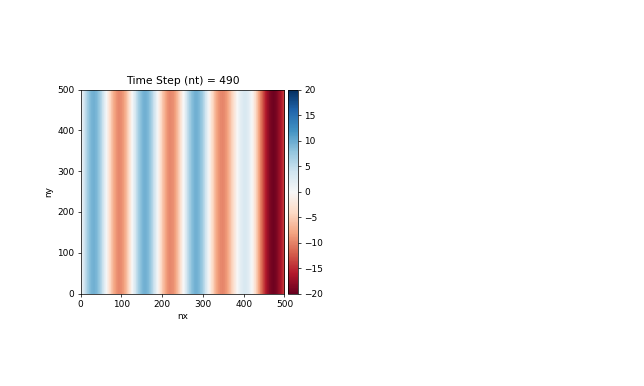

In [24]:
##setup da simulação
plt.ion()
fig2 = plt.figure(figsize=(10, 6))
gs2  = gridspec.GridSpec(1,2,width_ratios=[1,1],hspace=0.3, wspace=0.3)
ax3  = plt.subplot(gs2[0])
p = f1(x, C=1, D=1) #definição das condições iniciais
im3  = ax3.imshow(p, vmin=-20, vmax=+20, interpolation="nearest", cmap=plt.cm.RdBu)
div  = make_axes_locatable(ax3)
cax  = div.append_axes("right", size="5%", pad=0.05) # size & position of colorbar
fig2.colorbar(im3, cax=cax) # plot colorbar
ax3.set_title('Time Step (nt) = 0')
ax3.set_xlim(0, nx)
ax3.set_ylim(0, ny)
ax3.set_xlabel('nx')
ax3.set_ylabel('ny')
plt.show() #todos estas linhas servem para desenhar a figura que será a base da simulação

In [25]:
##Simulação - este bloco irá atualizar a figura em cima com a evolução do tempo
for it in range(nt): #iterar pelos timesteps
    for i in range(1, ny-1): 
        d2px[:, i] = (p[:, i - 1] - 2 * p[:, i] + p[:, i + 1]) / dx ** 2
    for j in range(1, ny-1):
        d2py[j, :] = (p[j - 1, :] - 2 * p[j, :] + p[j + 1, :]) / dy ** 2 #calculo das derivadas parciais espaciais
  
    pnew = 2 * p - pold + (v ** 2) * (dt ** 2) * (d2py + d2px) #calculo da pressão em n+1 através das derivadas parciais e da pressão em n e n-1

    pold, p = p, pnew #remapping das pressões
    
    idisp = 10  #frequência de atualização do gráfico
    if (it % idisp) == 0:
        ax3.set_title('Time Step (nt) = %d' % it)
        ax3.imshow(p,vmin=-100, vmax=+100, interpolation="nearest", cmap=plt.cm.RdBu)
        plt.gcf().canvas.draw()

Podemos observar já nesta simulação aquele que é um defeito deste tipo de simulações: erros numéricos que podem fazer a simulação divergir do pretendido. Nesta simulação da propagação a partir de uma função seno vemos uma mancha vermelha na direita a aparecer, que parece claramente ser um erro da simulação. Neste caso, talvez tenha a ver com a falta de informação para o cálculo das derivadas nas fronteiras e da aproximação se tornar mais grosseira aí. De qualquer forma, a análise matemática deste tipo de erros vai para além do propósito deste projeto, mas deixo aqui dois critérios simples que procurei cumprir.

#### Número de pontos por comprimento de onda
Este critério é bastante intuitivo, tendo em conta a sua semelhança com outros critérios que estudámos durante o semestre para fazer aproximações semelhantes, e indica que quanto mais pontos $dx$ ou $dy$ houver por comprimento de onda $\lambda$, mais estável será a simulação. Este é um dos critérios que permite determinar o quão "pequeno" devem ser $dx$ e $dy$, ou seja, são pequenos relativamente ao comprimento de onda da onda que estivermos a estudar.

#### Critério de Courant
O critério de Courant, derivado através da análise matemática deste método, define-se como: 

$$
\epsilon = c \frac{ dt}{dx} \leq 1
$$

Com esta informação podemos calcular o tamanho de dt para uma simulação estável, que está portanto relacionado com dx e com a velociade de propagação de ondas no meio em estudo. 

O próximo exemplo será semelhante, mas com uma função um pouco mais interessante:
$$
f(x,y)=sin(0.03*(x+y))  
$$

<IPython.core.display.Javascript object>


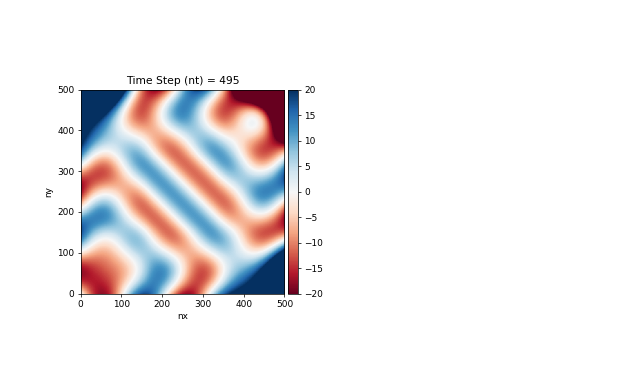

In [30]:
pressInit() #zerar as pressões

#setup da simulação
plt.ion()
fig2 = plt.figure(figsize=(10, 6))
gs2  = gridspec.GridSpec(1,2,width_ratios=[1,1],hspace=0.3, wspace=0.3)
ax3  = plt.subplot(gs2[0])
p = np.sin(0.03*(x+y)) #condições iniciais
im3  = ax3.imshow(p, vmin=-20, vmax=+20, interpolation="nearest", cmap=plt.cm.RdBu)
div  = make_axes_locatable(ax3)
cax  = div.append_axes("right", size="5%", pad=0.05) # size & position of colorbar
fig2.colorbar(im3, cax=cax) # plot colorbar
ax3.set_title('Time Step (nt) = 0')
ax3.set_xlim(0, nx)
ax3.set_ylim(0, ny)
ax3.set_xlabel('nx')
ax3.set_ylabel('ny')
plt.show() #todos estas linhas servem para desenhar a figura que será a base da simulação

In [31]:
##Simulação - este bloco irá atualizar a figura em cima com a evolução do tempo
for it in range(nt): #iterar pelos timesteps
    for i in range(1, ny-1):
        d2px[:, i] = (p[:, i - 1] - 2 * p[:, i] + p[:, i + 1]) / dx ** 2
    for j in range(1, ny-1):
        d2py[j, :] = (p[j - 1, :] - 2 * p[j, :] + p[j + 1, :]) / dy ** 2  #calculo das derivadas parciais espaciais
  
    pnew = 2 * p - pold + (v ** 2) * (dt ** 2) * (d2py + d2px) #calculo da pressão em n+1 através das derivadas parciais e da pressão em n e n-1

    pold, p = p, pnew #remapping das pressões
    idisp = 5 #frequência de atualização do gráfico
    if (it % idisp) == 0:
        ax3.set_title('Time Step (nt) = %d' % it)
        ax3.imshow(p,vmin=-100, vmax=+100, interpolation="nearest", cmap=plt.cm.RdBu)
        plt.gcf().canvas.draw()

Passemos a uma análise diferente, onde também iremos abordar o fenómeno de interferência. Desta vez, inicializamos a pressão a 0 em todo o nosso espaço, e adicionamos uma fonte de sinal no centro. Assim, podemos simular a forma como o sinal se propaga. Para começar olhemos para a função simples:
$$
f(t)=sin(20*t)*10^{-2}
$$

In [32]:
pressInit() #colocar as pressões a zeros

isx  = 250          # localização da fonte de sinal: no centro do nosso espaço discretizado
isy  = isx          

src  = np.zeros(nt + 1)
time = np.linspace(0 * dt, nt * dt, nt)
src = 1e-2*np.sin(20*time) #função da fonte

<IPython.core.display.Javascript object>


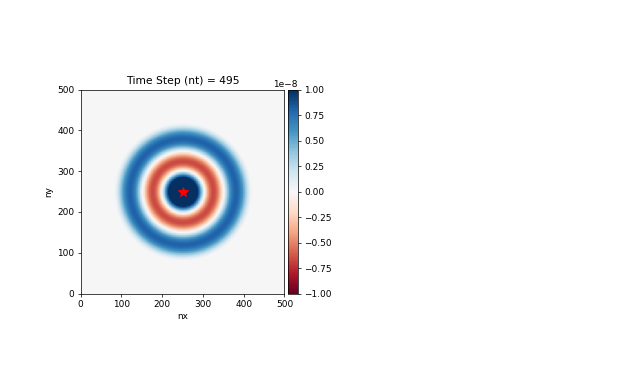

In [33]:
#setup simulação

plt.ion()
fig2 = plt.figure(figsize=(10, 6))
gs2  = gridspec.GridSpec(1,2,width_ratios=[1,1],hspace=0.3, wspace=0.3)
ax3  = plt.subplot(gs2[0])
leg1,= ax3.plot(isx, isy, 'r*', markersize=11) # colocar no gráfico a posição da fonte com uma estrela
im3  = ax3.imshow(p, vmin=-1e-8, vmax=+1e-8, interpolation="nearest", cmap=plt.cm.RdBu)
div  = make_axes_locatable(ax3)
cax  = div.append_axes("right", size="5%", pad=0.05) 
fig2.colorbar(im3, cax=cax) 
ax3.set_title('Time Step (nt) = 0')
ax3.set_xlim(0, nx)
ax3.set_ylim(0, ny)
ax3.set_xlabel('nx')
ax3.set_ylabel('ny')
plt.show() ##tudo configurações do gráfico

In [34]:
##Simulação - este bloco irá atualizar a figura em cima com a evolução do tempo
for it in range(nt): #iterar pelos timesteps
    for i in range(1, ny-1):
        d2px[:, i] = (p[:, i - 1] - 2 * p[:, i] + p[:, i + 1]) / dx ** 2
    for j in range(1, ny-1):
        d2py[j, :] = (p[j - 1, :] - 2 * p[j, :] + p[j + 1, :]) / dy ** 2  #calculo das derivadas parciais espaciais
  
    pnew = 2 * p - pold + (v ** 2) * (dt ** 2) * (d2py + d2px) #calculo da pressão em n+1 através das derivadas parciais e da pressão em n e n-1
    
    pnew[isy, isx] = pnew[isy, isx] + src[it] / (dx * dy) * (dt ** 2) #adicionar na posição da fonte a função que gera o sinal

    pold, p = p, pnew #remapping das pressões
    idisp = 5 #frequência de atualização do gráfico
    if (it % idisp) == 0:
        ax3.set_title('Time Step (nt) = %d' % it)
        ax3.imshow(p,vmin=-1e-8, vmax=+1e-8, interpolation="nearest", cmap=plt.cm.RdBu)
        plt.gcf().canvas.draw()

De seguida, um exemplo semelhante mas com uma função esquisita o suficiente para valer a pena ser simulada:
$$
f(t)=-8*(t-t0)*f0*e^{-(4*f0)^2*(t-t0)^2}
$$

In [35]:
pressInit()

isx  = 250          # localização da fonte do sinal
isy  = isx          
f0   = 25. # frequencia dominante da fonte (Hz)
t0   = 2. / f0 

#função da fonte
src  = np.zeros(nt + 1)
time = np.linspace(0 * dt, nt * dt, nt)
src  = -8. * (time - t0) * f0 * (np.exp(-1.0 * (4*f0) ** 2 * (time - t0) ** 2))

<IPython.core.display.Javascript object>


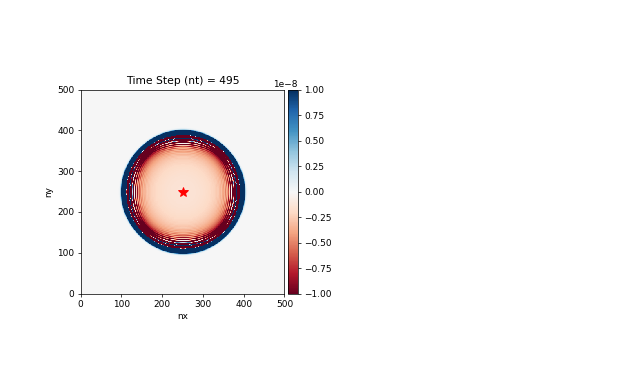

In [36]:
#setup da simulação
plt.ion()
fig2 = plt.figure(figsize=(10, 6))
gs2  = gridspec.GridSpec(1,2,width_ratios=[1,1],hspace=0.3, wspace=0.3)
ax3  = plt.subplot(gs2[0])
leg1,= ax3.plot(isx, isy, 'r*', markersize=11) # posição da fonte marcada com uma estrela
im3  = ax3.imshow(p, vmin=-1e-8, vmax=+1e-8, interpolation="nearest", cmap=plt.cm.RdBu)
div  = make_axes_locatable(ax3)
cax  = div.append_axes("right", size="5%", pad=0.05) 
fig2.colorbar(im3, cax=cax) 
ax3.set_title('Time Step (nt) = 0')
ax3.set_xlim(0, nx)
ax3.set_ylim(0, ny)
ax3.set_xlabel('nx')
ax3.set_ylabel('ny')
plt.show()

In [37]:
##Simulação - este bloco irá atualizar a figura em cima com a evolução do tempo
for it in range(nt): #iterar pelos timesteps
    for i in range(1, ny-1):
        d2px[:, i] = (p[:, i - 1] - 2 * p[:, i] + p[:, i + 1]) / dx ** 2
    for j in range(1, ny-1):
        d2py[j, :] = (p[j - 1, :] - 2 * p[j, :] + p[j + 1, :]) / dy ** 2  #calculo das derivadas parciais espaciais
  
    pnew = 2 * p - pold + (v ** 2) * (dt ** 2) * (d2py + d2px) #calculo da pressão em n+1 através das derivadas parciais e da pressão em n e n-1
    
    pnew[isy, isx] = pnew[isy, isx] + src[it] / (dx * dy) * (dt ** 2) #adição da fonte de sinal

    pold, p = p, pnew #remapping
    idisp = 5 #frequência de atualização do gráfico
    if (it % idisp) == 0:
        ax3.set_title('Time Step (nt) = %d' % it)
        ax3.imshow(p,vmin=-1e-8, vmax=+1e-8, interpolation="nearest", cmap=plt.cm.RdBu)
        plt.gcf().canvas.draw()

### Interferência

Por fim, podemos usar esta simulação simples para observar outro fenómeno importante - a interferência entre duas ondas. Visto que a interferência não é mais do que a soma de dois sinais/ondas, a simulação é computacionalmente muito simples. Usando as duas funções anteriores como os nossos sinais, colocamos desta vez duas fontes diferentes no espaço.

In [38]:
# o mesmo que em cima
pressInit()

isx  = 175          
isy  = 250          
isx2 = 325
isy2 = 250
f0   = 25. 
t0   = 2. / f0 


src  = np.zeros(nt + 1)
time = np.linspace(0 * dt, nt * dt, nt)
src  = -8. * (time - t0) * f0 * (np.exp(-1.0 * (4*f0) ** 2 * (time - t0) ** 2))
src = 1e-2*np.sin(20*time)

<IPython.core.display.Javascript object>


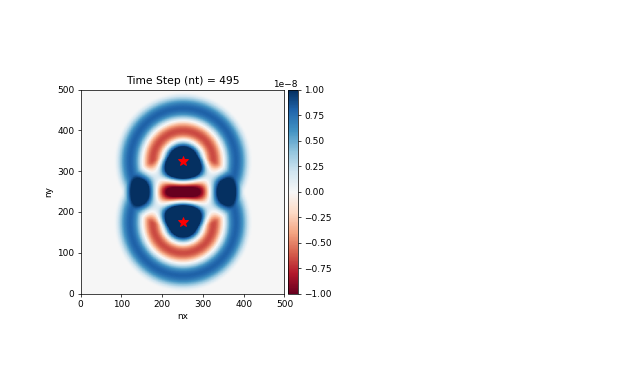

In [39]:
#setup da simulação
plt.ion()
fig2 = plt.figure(figsize=(10, 6))
gs2  = gridspec.GridSpec(1,2,width_ratios=[1,1],hspace=0.3, wspace=0.3)
ax3  = plt.subplot(gs2[0])
leg1,= ax3.plot(isy, isx, 'r*', markersize=11) 
leg2,= ax3.plot(isy2, isx2, 'r*', markersize=11) 
im3  = ax3.imshow(p, vmin=-1e-8, vmax=+1e-8, interpolation="nearest", cmap=plt.cm.RdBu)
div  = make_axes_locatable(ax3)
cax  = div.append_axes("right", size="5%", pad=0.05) 
fig2.colorbar(im3, cax=cax) 
ax3.set_title('Time Step (nt) = 0')
ax3.set_xlim(0, nx)
ax3.set_ylim(0, ny)
ax3.set_xlabel('nx')
ax3.set_ylabel('ny')
plt.show()

In [40]:
##Simulação - este bloco irá atualizar a figura em cima com a evolução do tempo
for it in range(nt): #iterar pelos timesteps
    for i in range(1, ny-1):
        d2px[:, i] = (p[:, i - 1] - 2 * p[:, i] + p[:, i + 1]) / dx ** 2
    for j in range(1, ny-1):
        d2py[j, :] = (p[j - 1, :] - 2 * p[j, :] + p[j + 1, :]) / dy ** 2  #calculo das derivadas parciais espaciais
  
    pnew = 2 * p - pold + (v ** 2) * (dt ** 2) * (d2py + d2px) #calculo da pressão em n+1 através das derivadas parciais e da pressão em n e n-1
    
    pnew[isx, isy] = pnew[isx, isy] + src[it] / (dx * dy) * (dt ** 2)
    pnew[isx2, isy2] = pnew[isx2, isy2] + src[it] / (dx * dy) * (dt ** 2) #adição das duas fontes
    

    pold, p = p, pnew #remapping
    idisp = 5 #frequência de atualização do gráfico
    if (it % idisp) == 0:
        ax3.set_title('Time Step (nt) = %d' % it)
        ax3.imshow(p,vmin=-1e-8, vmax=+1e-8, interpolation="nearest", cmap=plt.cm.RdBu)
        plt.gcf().canvas.draw()

In [41]:
#o mesmo que em cima
pressInit()

isx  = 175          
isy  = 250          
isx2 = 325
isy2 = 250
f0   = 25. 
t0   = 2. / f0 


src  = np.zeros(nt + 1)
time = np.linspace(0 * dt, nt * dt, nt)
src  = -8. * (time - t0) * f0 * (np.exp(-1.0 * (4*f0) ** 2 * (time - t0) ** 2))

<IPython.core.display.Javascript object>


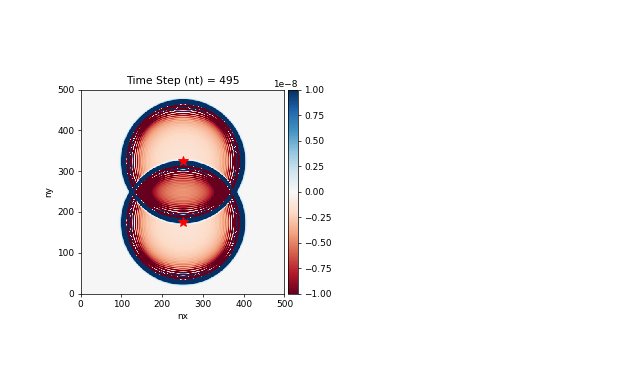

In [42]:
#setup da simulação
plt.ion()
fig2 = plt.figure(figsize=(10, 6))
gs2  = gridspec.GridSpec(1,2,width_ratios=[1,1],hspace=0.3, wspace=0.3)
ax3  = plt.subplot(gs2[0])
leg1,= ax3.plot(isy, isx, 'r*', markersize=11) 
leg2,= ax3.plot(isy2, isx2, 'r*', markersize=11) 
im3  = ax3.imshow(p, vmin=-1e-8, vmax=+1e-8, interpolation="nearest", cmap=plt.cm.RdBu)
div  = make_axes_locatable(ax3)
cax  = div.append_axes("right", size="5%", pad=0.05) 
fig2.colorbar(im3, cax=cax) 
ax3.set_title('Time Step (nt) = 0')
ax3.set_xlim(0, nx)
ax3.set_ylim(0, ny)
ax3.set_xlabel('nx')
ax3.set_ylabel('ny')
plt.show()

In [43]:
##Simulação - este bloco irá atualizar a figura em cima com a evolução do tempo
for it in range(nt): #iterar pelos timesteps
    for i in range(1, ny-1):
        d2px[:, i] = (p[:, i - 1] - 2 * p[:, i] + p[:, i + 1]) / dx ** 2
    for j in range(1, ny-1):
        d2py[j, :] = (p[j - 1, :] - 2 * p[j, :] + p[j + 1, :]) / dy ** 2  #calculo das derivadas parciais espaciais
  
    pnew = 2 * p - pold + (v ** 2) * (dt ** 2) * (d2py + d2px) #calculo da pressão em n+1 através das derivadas parciais e da pressão em n e n-1
    
    pnew[isx, isy] = pnew[isx, isy] + src[it] / (dx * dy) * (dt ** 2)
    pnew[isx2, isy2] = pnew[isx2, isy2] + src[it] / (dx * dy) * (dt ** 2) #adição das fontes de sinal
    

    pold, p = p, pnew #remapping
    idisp = 5 #frequência de atualização do gráfico
    if (it % idisp) == 0:
        ax3.set_title('Time Step (nt) = %d' % it)
        ax3.imshow(p,vmin=-1e-8, vmax=+1e-8, interpolation="nearest", cmap=plt.cm.RdBu)
        plt.gcf().canvas.draw()

### Conclusão
Com este projeto, é possível demonstrar uma introdução à simplicidade com que o Python nos permite fazer simulações computacionais interessantes e poderosas, e olhar de uma outra forma ao conteúdo aprendido nesta cadeira ao longo do semestre.